## 1. Google Play Store apps and reviews
<p>Las aplicaciones móviles están en todas partes. Son fáciles de crear y pueden resultar muy lucrativas. Debido a estos dos factores, se están desarrollando cada vez más aplicaciones. En este ejercicio, haremos un análisis completo del mercado de aplicaciones de Android comparando más de diez mil aplicaciones en Google Play en diferentes categorías. Buscaremos información valiosa en los datos para diseñar estrategias que impulsen el crecimiento y la retención.</p>
<p><img src="https://assets.datacamp.com/production/project_619/img/google_play_store.png" alt="Google Play logo"></p>
<p>Tenemos dos fuentes de datos:</p>
<ul>
<li><code>apps.csv</code>: contiene todos los detalles de las aplicaciones en Google Play. Hay 13 características que describen una aplicación determinada.</li>
<li><code>user_reviews.csv</code>: contiene 100 reseñas para cada aplicación, <a href="https://www.androidpolice.com/2019/01/21/google-play-stores-redesigned-ratings-and-reviews-section-lets-you-easily-filter-by-star-rating/">reviews</a>. El texto de cada reseña se ha procesado previamente y se le atribuyen tres características nuevas: Sentimiento (positivo, negativo o neutral), Polaridad del sentimiento y Subjetividad del sentimiento..</li>
</ul>

In [71]:
# Importa las librerías de pandas y matplotlib
import pandas as pd
import matplotlib.pyplot as plt


# Importa el datase apps.csv
apps = pd.read_csv('apps.csv')
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            8432 non-null   float64
 5   Installs        9659 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 981.1+ KB


In [72]:
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [73]:

# Borra todos los duplicados del dataset
import numpy as np
np.sum(apps.duplicated())

0

In [74]:
np.sum(apps.duplicated(subset='App'))

0

In [75]:

duplicates = apps[apps.duplicated(subset=['App'])]
duplicates


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [76]:
apps = apps.drop_duplicates(subset='App')
np.sum(apps.duplicated(subset='App'))

0

In [77]:

# Imprime el total de apps que se van a analizar que quedan (dimensión)
print('Total number of apps in the dataset = ', apps.count()[0])


Total number of apps in the dataset =  9659


In [78]:

# Imprime la estádistica descriptiva de resumen
print(apps.describe())


            Rating       Reviews         Size
count  8196.000000  9.659000e+03  8432.000000
mean      4.173243  2.165926e+05    20.395327
std       0.536625  1.831320e+06    21.827509
min       1.000000  0.000000e+00     0.000000
25%       4.000000  2.500000e+01     4.600000
50%       4.300000  9.670000e+02    12.000000
75%       4.500000  2.940100e+04    28.000000
max       5.000000  7.815831e+07   100.000000


In [79]:

# Vamos a echar un vistazo al DataFrame final
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            8432 non-null   float64
 5   Installs        9659 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 981.1+ KB
None


## 2. Data cleaning
<p>Las cuatro variables con las que trabajaremos con más frecuencia de ahora en adelante son <i>Installs</i>, <i>Size</i>, <i>Rating</i> y <i>Price</i>. La función <code>info()</code> nos dice que las columnas <i>Installs</i> y <i>Price</i> son de tipo <code>object</code>, no son de tipo <code>int</code> o <code>float</code> como esperaríamos. Esto se debe a que la columna contiene algunos caracteres más que solo [0,9] dígitos. Idealmente, queremos que estas columnas fueran puramente numéricas<br>
<br>
Por lo tanto, ahora necesitamos limpiar nuestros datos. Específicamente, los caracteres especiales <code>,</code> y <code>+</code> que se encuentran en la columna <i>Installs</i> y <code>$</code> que esta en la columna <i>Price</i>.</p>

<p>Aquí un link donde podrás ver un poco más a detalle que es una <a href="https://www.freecodecamp.org/espanol/news/expresiones-lambda-en-python/">función lambda</a>

In [80]:
# Lista de caracteres a eliminar
chars_to_remove = [",", "+", "$"]
# Lista de las columnas a limpiar
cols_to_clean = ["Installs", "Price"]

# Loop para cada columna
for col in cols_to_clean:
    # Loop para cada caracter especial
    for char in chars_to_remove:
        # Reemplaza con una función lambda el caracter especial por un texto vacío ('')
        apps[col] = apps[col].apply(lambda x: x.replace(char, ''))
    # Convierte la columna a tipo flotante (float)
    apps[col] = apps[col].astype(np.float64)

In [81]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            8432 non-null   float64
 5   Installs        9659 non-null   float64
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 981.1+ KB


## 3. Exploring App's categories
<p>Con más de mil millones de usuarios activos en 190 países de todo el mundo, Google Play sigue siendo una importante plataforma de distribución para crear una audiencia global. Para que las empresas muestren sus aplicaciones a los usuarios, es importante hacerlas más rápida y fácilmente visibles en Google Play. Para mejorar la experiencia de búsqueda general, Google ha introducido el concepto de agrupar aplicaciones en categorías.</p>
<p>Esto nos lleva a las siguientes preguntas:</p>
<ul>
<li>¿Qué categoría tiene la mayor participación de aplicaciones (activas) en el mercado?</li>
<li>¿Alguna categoría específica domina el mercado?</li>
<li>¿Qué categorías tienen la menor cantidad de aplicaciones?</li>
</ul>
<p>Vamos a responder estas preguntas aquí <code>33</code> categorías unicas estan presentas en nuestro dataset. Las apps de <em>Family</em> y <em>Game</em> tienen la mayor prevalencia del mercado. Curiosamente, <em>Tools</em>, <em>Business</em> y <em>Medical</em> también están en el top.</p>

In [82]:
# Imprime el total de categorías únicas
num_categories = apps['Category'].nunique()
print('Number of categories = ', num_categories)


Number of categories =  33


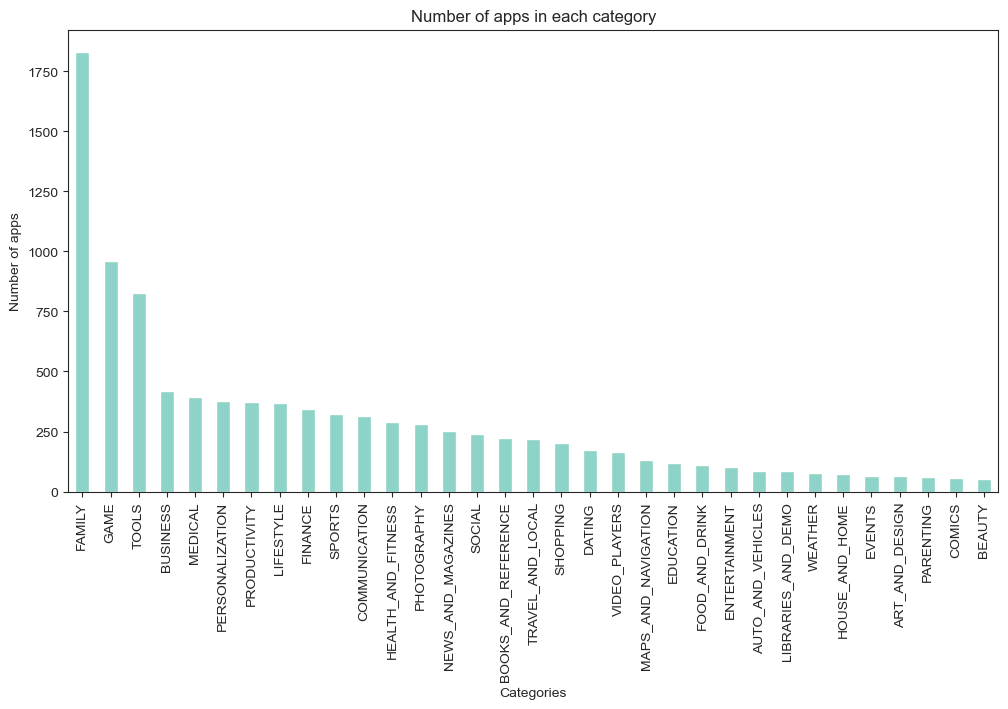

In [83]:

# Cuenta el número de aplicaciones en cada Categoría y ordena de manera descendente 
num_apps_in_category = apps['Category'].value_counts().sort_values(ascending=False)

# Muestra el resultado en una gráfica de barras
plt.figure(figsize=(12,6))
num_apps_in_category.plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Number of apps')
plt.title('Number of apps in each category')
plt.show()

## 4. Ratings Distribution
<p>Después de analizar la participación de mercado para cada categoría de las aplicaciones, veamos cómo se posicionan de acuerdo a las calificaciones (en una escala del 1 al 5) las cuales afectan la imagen de la marca general de la empresa. Las calificaciones son un indicador clave de rendimiento de una aplicación.</p>

In [84]:
# Calcular el promedio de calificación de las apps
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)


Average app rating =  4.173243045387994


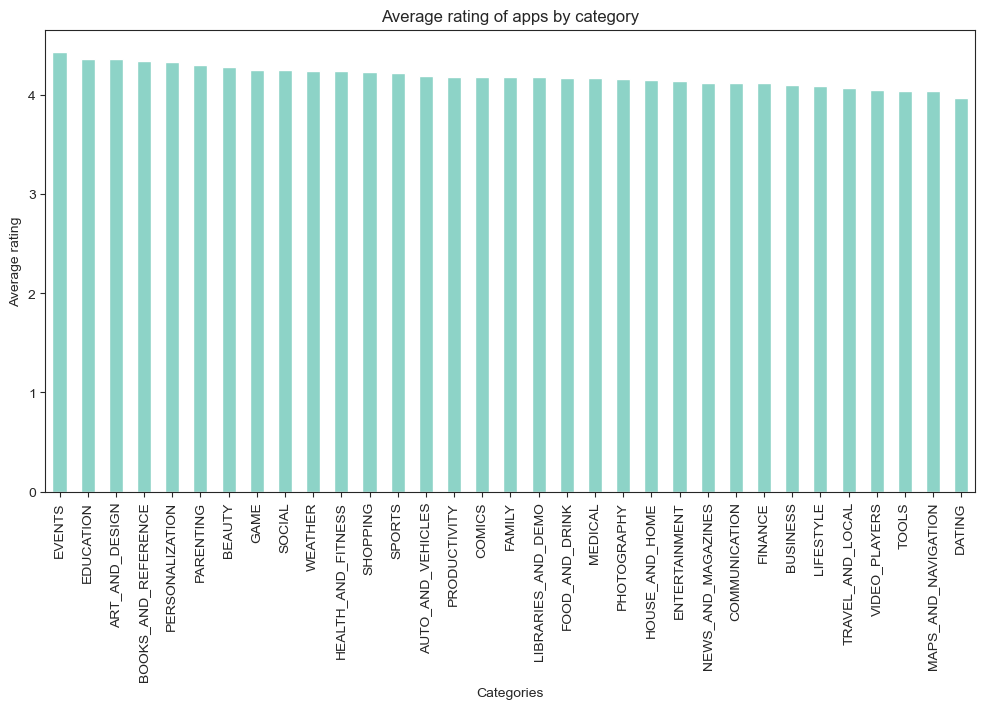

In [85]:

# Calcula el promedio de calificación por categoría
avg_app_rating_by_category = apps.groupby('Category')['Rating'].mean().sort_values(ascending=False)
# Visualiza en un histograma el comportamiento del Rating
plt.figure(figsize=(12,6))
avg_app_rating_by_category.plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Average rating')
plt.title('Average rating of apps by category')
plt.show()

## 5. Size and Price
<p>Examinemos ahora el tamaño y el precio de la aplicación. En cuanto al tamaño, si la aplicación móvil es demasiado grande, puede ser difícil y/o costoso para los usuarios descargarla. Los tiempos de descarga prolongados pueden desanimar a los usuarios incluso antes de que experimenten su aplicación móvil. Además, el dispositivo de cada usuario tiene una cantidad limitada de espacio en disco. Por el precio, algunos usuarios esperan que sus aplicaciones sean gratuitas o económicas. Estos problemas se agravan si el mercado objetivo es en países en vías de desarrollo; especialmente debido a las velocidades de Internet, el poder adquisitivo, los tipos de cambio, etc.</p>
<p>How can we effectively come up with strategies to size and price our app?</p>
<ul>
<li>¿El tamaño de una aplicación afecta su calificación?</li>
<li>¿Los usuarios realmente se preocupan por las aplicaciones pesadas del sistema o prefieren las aplicaciones ligeras? </li>
<li>¿El precio de una aplicación afecta su calificación? </li>
<li>¿Los usuarios siempre prefieren las aplicaciones gratuitas a las de paga?</li>
</ul>

In [86]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

sns.set_style("darkgrid")

# Filtra filas donde los valores de 'Rating' y 'Size' no sean nulos
apps_with_size_and_rating_present = apps[(~apps['Rating'].isnull()) & (~apps['Size'].isnull())]
apps_with_size_and_rating_present.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7027 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7027 non-null   object 
 1   Category        7027 non-null   object 
 2   Rating          7027 non-null   float64
 3   Reviews         7027 non-null   int64  
 4   Size            7027 non-null   float64
 5   Installs        7027 non-null   float64
 6   Type            7027 non-null   object 
 7   Price           7027 non-null   float64
 8   Content Rating  7027 non-null   object 
 9   Genres          7027 non-null   object 
 10  Last Updated    7027 non-null   object 
 11  Current Ver     7023 non-null   object 
 12  Android Ver     7025 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 768.6+ KB


In [87]:


# Filtra las categorías con al menos 250 apps
large_categories = apps_with_size_and_rating_present.groupby('Category').filter(lambda x: len(x) >= 250)
large_categories['Category'].value_counts()

Category
FAMILY             1512
GAME                832
TOOLS               626
PERSONALIZATION     276
LIFESTYLE           269
MEDICAL             266
FINANCE             258
Name: count, dtype: int64

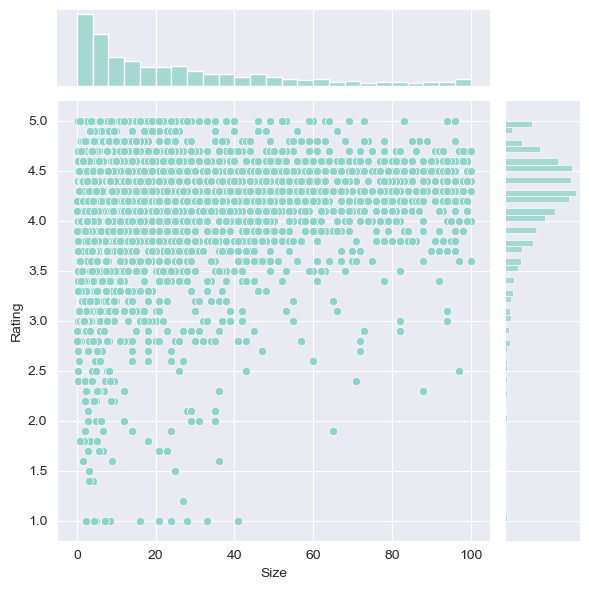

In [88]:

# Gráfica size vs. rating
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'])
plt.show()


In [89]:


# Selecciona las apps de paga 'Type' = 'Paid'
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type'] == 'Paid']
paid_apps.info()


<class 'pandas.core.frame.DataFrame'>
Index: 541 entries, 233 to 9603
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             541 non-null    object 
 1   Category        541 non-null    object 
 2   Rating          541 non-null    float64
 3   Reviews         541 non-null    int64  
 4   Size            541 non-null    float64
 5   Installs        541 non-null    float64
 6   Type            541 non-null    object 
 7   Price           541 non-null    float64
 8   Content Rating  541 non-null    object 
 9   Genres          541 non-null    object 
 10  Last Updated    541 non-null    object 
 11  Current Ver     540 non-null    object 
 12  Android Ver     540 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 59.2+ KB


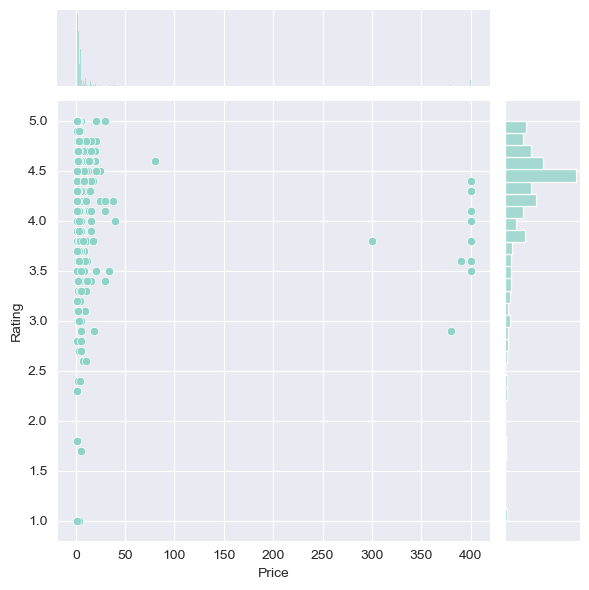

In [90]:

# Grafica price vs. rating de las paplicaciones de paga
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])	
plt.show()

## 6. Relation between Category & Price
<p>Así que ahora viene la parte difícil. ¿Cómo se supone que las empresas y los desarrolladores cubran sus cuotas de fin de mes? ¿Qué estrategias de monetización pueden utilizar las empresas para maximizar las ganancias? Los costos de las aplicaciones se basan en gran medida en las características, la complejidad y la plataforma. Hay muchos factores a considerar al seleccionar la estrategia de precios adecuada para las aplicaciones moviles. Es importante considerar la disposición de su cliente a pagar por la aplicación. Un precio elevado puede hacer que los clientes no se vean atraídos por descargarlaque ocurra la descarga o pueden eliminar una aplicación que han descargado después de recibir demasiados anuncios o simplemente no obtener el valor que esperaban de su dinero.</p>

<p>Las diferentes categorías exigen diferentes rangos de precios. Algunas aplicaciones que son simples y se usan a diario, como la aplicación de calculadora, probablemente deberían mantenerse gratuitas. Sin embargo, tendría sentido cobrar por una aplicación médica altamente especializada que diagnostica a pacientes diabéticos, así que vamos a descubrir y encontrar la respuesta</p>

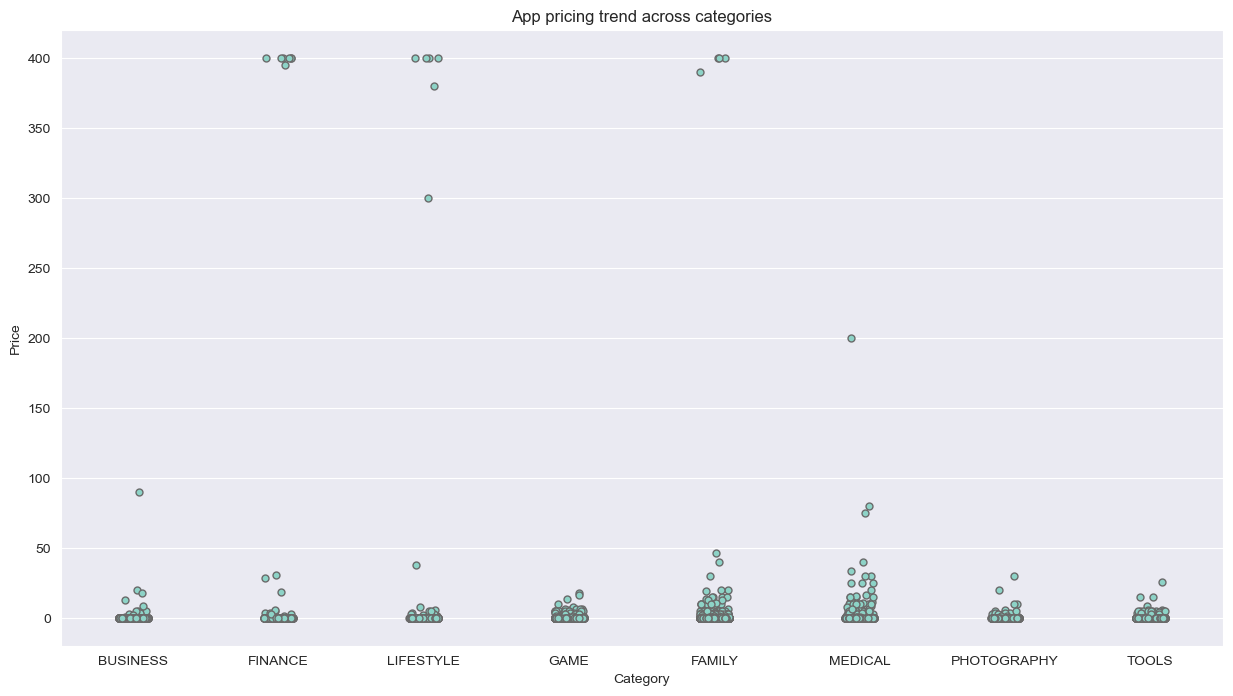

In [91]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Lista de categorías populares
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examina la tendencia de precio graficando el Precio por Categoría
ax = sns.stripplot(x = popular_app_cats['Category'], y = popular_app_cats['Price'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

plt.show()


In [92]:


# Selecciona las apps con un precio mayor a 200
apps_above_200 = apps[apps['Price'] > 200]
apps_above_200[['Category', 'App', 'Price']]

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


## 7. Paid apps vs Free apps
<p>Para las aplicaciones de Play Store en la actualidad, existen cinco tipos de estrategias de precios: gratis, "freemium", de pago, "paymium" y de suscripción. Centrémonos solo en aplicaciones gratuitas y de pago. 

Algunas características de las aplicaciones gratuitas son:</p>
<ul>
<li>Libres de descarga.</li>
<li>La principal fuente de ingresos a menudo proviene de la publicidad.</li>
<li>Por lo general son creadaa por empresas que tienen otros productos y la aplicación sirve como una extensión de esos productos.</li>
<li>Puede servir como una herramienta para la retención de clientes, la comunicación y el servicio al cliente.</li>
</ul>
<p>Algunas características de las aplicaciones de paga son:</p>
<ul>
<li>Tienen un tiempo de servicio de prueba gratuito, esto para que el usuario pueda conocerla.</li>
<li>Ofrecen un servicio de mayor especialidad.</li>
</ul>
<p>¿Además de esto que otras características diferencías a las aplicaciones de pago las aplicaciones gratuitas?</p>

In [93]:
import pandas as pd

# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Assuming `apps` is your DataFrame
apps_by_type = apps.groupby(apps['Type'])
describe_output = apps_by_type.describe()

# Filter to only include the mean values
mean_output = describe_output.loc[:, (slice(None), 'mean')]

# Reshape the output
reshaped_mean_output = mean_output.unstack()

print(reshaped_mean_output)

                Type
Rating    mean  Free    4.166372e+00
                Paid    4.259603e+00
Reviews   mean  Free    2.342437e+05
                Paid    8.724888e+03
Size      mean  Free    2.051756e+01
                Paid    1.901299e+01
Installs  mean  Free    8.431492e+06
                Paid    7.587947e+04
Price     mean  Free    0.000000e+00
                Paid    1.404515e+01
dtype: float64


Para responder a la pregunta sobre qué otras características diferencian a las aplicaciones gratuitas de las de pago, podemos analizar las estadísticas proporcionadas en el diagrama. Aquí hay un resumen de las diferencias clave:

1. **Rating (Calificación)**:
   - **Gratuitas**: La calificación media es de aproximadamente 4.17.
   - **De pago**: La calificación media es ligeramente superior, con aproximadamente 4.26.

2. **Reviews (Reseñas)**:
   - **Gratuitas**: El número medio de reseñas es significativamente mayor, con aproximadamente 234,243 reseñas.
   - **De pago**: El número medio de reseñas es mucho menor, con aproximadamente 8,725 reseñas.

3. **Size (Tamaño)**:
   - **Gratuitas**: El tamaño medio de las aplicaciones es de aproximadamente 20.52 MB.
   - **De pago**: El tamaño medio de las aplicaciones es ligeramente menor, con aproximadamente 19.01 MB.

4. **Installs (Instalaciones)**:
   - **Gratuitas**: El número medio de instalaciones es significativamente mayor, con aproximadamente 8,431,492 instalaciones.
   - **De pago**: El número medio de instalaciones es mucho menor, con aproximadamente 75,879 instalaciones.

5. **Price (Precio)**:
   - **Gratuitas**: El precio medio es de 0, ya que son gratuitas.
   - **De pago**: El precio medio es de aproximadamente 14.05 unidades monetarias.

En resumen, las aplicaciones gratuitas tienden a tener más reseñas y un mayor número de instalaciones en comparación con las aplicaciones de pago. Sin embargo, las aplicaciones de pago tienen una calificación media ligeramente superior. Además, las aplicaciones gratuitas suelen ser un poco más grandes en tamaño que las aplicaciones de pago.

## 8. Sentiment analysis
<p>La minería de datos de reseñas de usuarios para determinar cómo se sienten las personas acerca de su producto, marca o servicio se puede realizar mediante una técnica llamada análisis de sentimientos. Las reseñas de los usuarios de las aplicaciones se pueden analizar para identificar si el estado de ánimo es positivo, negativo o neutral con respecto a esa aplicación. Por ejemplo, las palabras positivas en la revisión de una aplicación pueden incluir palabras como "asombroso", "amigable", "bueno", "excelente" y "amor". Las palabras negativas pueden ser palabras como 'malware', 'odio', 'problema', 'reembolso' e 'incompetente'.</p>

<p>¿Qué podemos decir acerca del analisis de sentimiento de las aplicaciones?</p>

In [94]:
# Carga el archivo user_reviews.csv
reviews_df = pd.read_csv('user_reviews.csv')
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Review                  37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [95]:
# Une los dos DataFrames (join)
merged_df = pd.merge(apps, reviews_df, on = 'App', how = 'inner')
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61556 entries, 0 to 61555
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     61556 non-null  object 
 1   Category                61556 non-null  object 
 2   Rating                  61556 non-null  float64
 3   Reviews                 61556 non-null  int64  
 4   Size                    41150 non-null  float64
 5   Installs                61556 non-null  float64
 6   Type                    61556 non-null  object 
 7   Price                   61556 non-null  float64
 8   Content Rating          61556 non-null  object 
 9   Genres                  61556 non-null  object 
 10  Last Updated            61556 non-null  object 
 11  Current Ver             61556 non-null  object 
 12  Android Ver             61556 non-null  object 
 13  Review                  35929 non-null  object 
 14  Sentiment               35934 non-null

In [96]:

# Elimina los valores nulos (NA) de las columnas Sentiment y Review
merged_df = merged_df.dropna(subset = ['Sentiment', 'Review'])
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 35929 entries, 0 to 61555
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     35929 non-null  object 
 1   Category                35929 non-null  object 
 2   Rating                  35929 non-null  float64
 3   Reviews                 35929 non-null  int64  
 4   Size                    24069 non-null  float64
 5   Installs                35929 non-null  float64
 6   Type                    35929 non-null  object 
 7   Price                   35929 non-null  float64
 8   Content Rating          35929 non-null  object 
 9   Genres                  35929 non-null  object 
 10  Last Updated            35929 non-null  object 
 11  Current Ver             35929 non-null  object 
 12  Android Ver             35929 non-null  object 
 13  Review                  35929 non-null  object 
 14  Sentiment               35929 non-null  obj

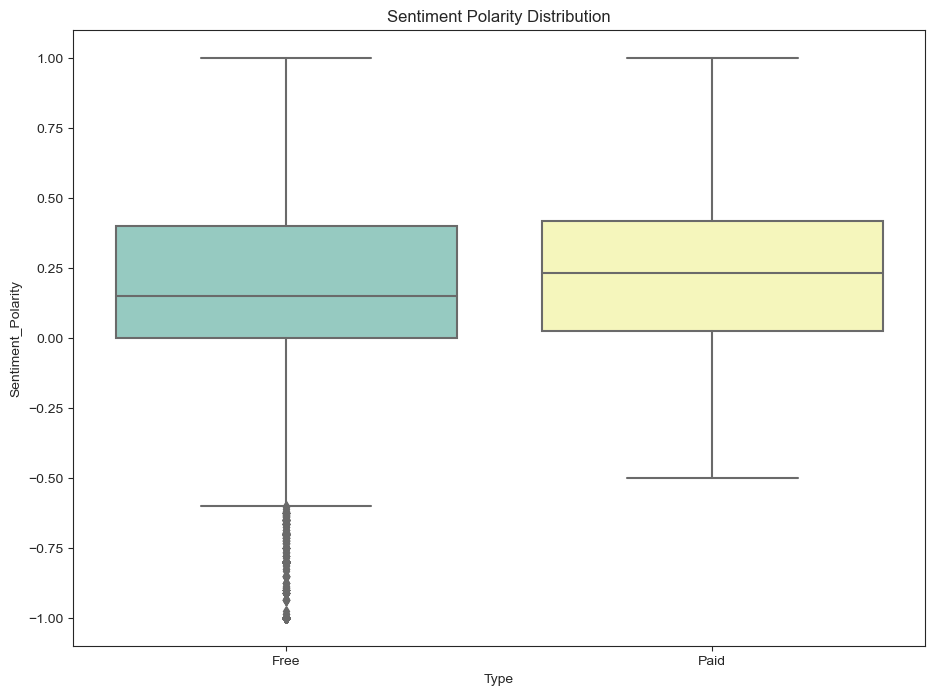

In [97]:

# Grafica la polaridad de sentimientos para apps gratuitas y de paga
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')
plt.show()

## 9. Conclusion
<p>En este cuaderno, analizamos más de diez mil aplicaciones de Google Play Store. Podemos usar nuestros hallazgos para poder encontrar información valiosa por si alguna vez deseamos crear una aplicación nosotros mismos. Espero que hayas disfrutado el curso!!! :)
    
Atte. <a href="https://www.linkedin.com/in/ivan-alducin-a87a71108/">Ivan Alducin</a></p>